In [1]:
import warnings
warnings.filterwarnings('ignore')

# 비지도 학습
- Target이 없는 데이터를 분류하기
- 군집화, 차원축소가 있음

---
# 군집 알고리즘
- 과일 데이터 사진을 보고 사과, 파인애플, 바나나로 3분류하기

In [5]:
# 과일 데이터 불러오기(numpy 파일)
import numpy as np
fruits = np.load('../Data/fruits.npy')
fruits.shape


(300, 100, 100)

> 흑백 이미지   
> 300개의 이미지가 100 X 100 픽셀로 구성  
> 100개는 사과, 100개는 파인애플, 100개는 바나나  

In [9]:
fruits[0,0,:]

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   4,   3,   2,   1,   0,   0,   0,
         0,   6,   1,   0,   4,   3,   0,   1,   8,  14,   0,   0,   4,
         8,  13,  13, 156, 191, 116,  30,   3,   0,   0,   3,   6,   2,
         1,   0,   0,   0,   0,   1,   4,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=int32)

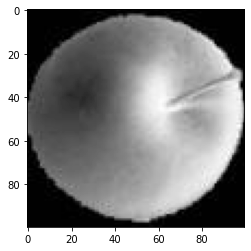

In [19]:
# 사과 이미지 보기 : 이미지로 확인하기
import matplotlib.pyplot as plt

plt.imshow(
    fruits[20],
    cmap='gray'
)

plt.show()

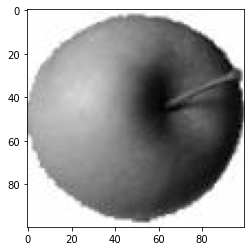

In [20]:
# qhrl vusgkrp qusrudgkrl
plt.imshow(fruits[20], cmap='gray_r')
plt.show()

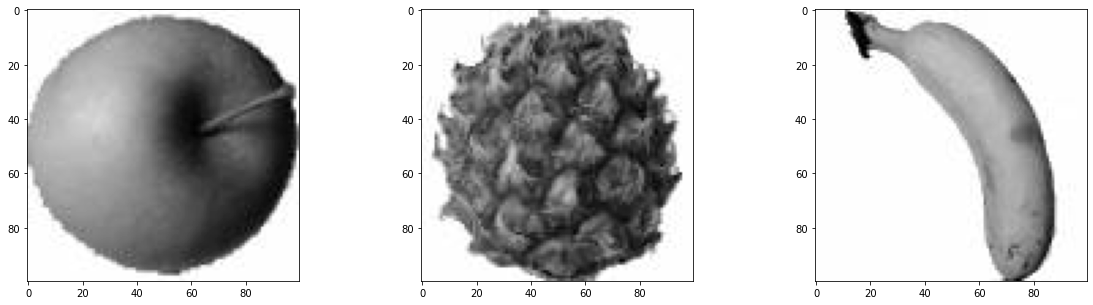

In [22]:
# 사과, 파인애플, 바나나 이미지를 나란히 보기
    #  1행3열
fig, axs = plt.subplots(1,3, figsize = (20,5))
axs[0].imshow(fruits[20], cmap='gray_r')
axs[1].imshow(fruits[100], cmap='gray_r')
axs[2].imshow(fruits[220], cmap='gray_r')

### 샘플 차원 변경하기
- 현재 3차원의배열을 분석을 위한 2차원 배열로 변경
- 배열 중 page단의 수는 apple, pineapple, banana로 분류하게 변경하기


In [26]:
apple = fruits[0:100].reshape(-1,100*100)
pineapple = fruits[100:200].reshape(-1,100*100)
banana = fruits[200:300].reshape(-1,100*100)

<img src='../Data/reshape(차원축소).png'>
<br>
차원축소


In [27]:
apple.shape

(100, 10000)

### 픽셀값 분석하기


In [28]:
# apple의 sample별(행별) 평균 구하기
apple.mean(axis=1)

array([ 88.4588,  98.0594,  87.4831,  98.4898,  92.9991,  82.7579,
        94.536 ,  95.7095,  90.7508,  81.7788,  87.1803,  95.2125,
        93.9517,  87.1466,  97.6411,  87.3593,  89.0571, 101.0366,
        92.8971, 101.0462, 105.0824,  88.7961,  99.6585,  97.359 ,
        94.2293,  92.2932,  95.2592,  93.4393, 103.0312,  94.7767,
        90.6388,  89.1673,  97.8923,  97.4053, 100.8732,  90.6799,
       100.3753,  85.9834,  96.5866,  97.2989,  90.8155, 102.4502,
        87.3238,  89.9929,  86.8717,  86.4904,  95.3862,  89.289 ,
        96.9175,  91.782 ,  96.2412,  99.7925,  95.1062,  87.5648,
        89.3416,  89.6668,  93.9096,  97.5639,  87.2779,  97.9526,
       103.3378,  94.5728,  83.8009,  83.6077, 102.9481,  87.1496,
        91.3842, 100.5921,  93.9603,  90.9806,  97.5707,  97.574 ,
        82.5605,  87.2897,  97.0628,  90.4258,  90.6506,  97.741 ,
        98.1869,  93.7264,  87.536 ,  84.8565,  89.2303,  86.8919,
        88.8434,  86.7783,  96.8703,  97.3682,  82.0917,  87.3

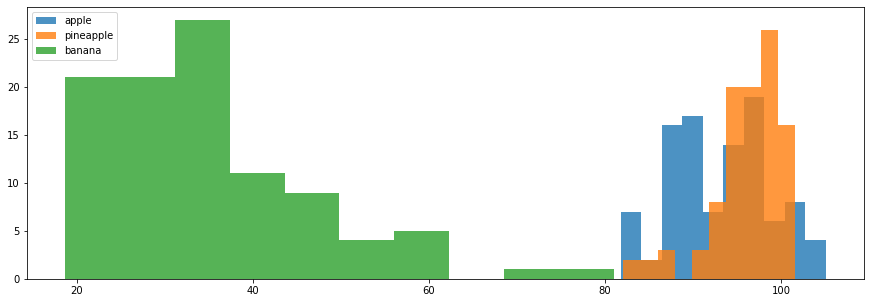

In [35]:
# 과일별(Sample별) 빈도수를 히스토그램으로 표현하기
plt.figure(figsize=(15,5))

plt.hist(np.mean(apple, axis=1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis=1), alpha = 0.8)
plt.hist(np.mean(banana, axis=1), alpha = 0.8)

plt.legend(['apple','pineapple','banana'])

plt.show()

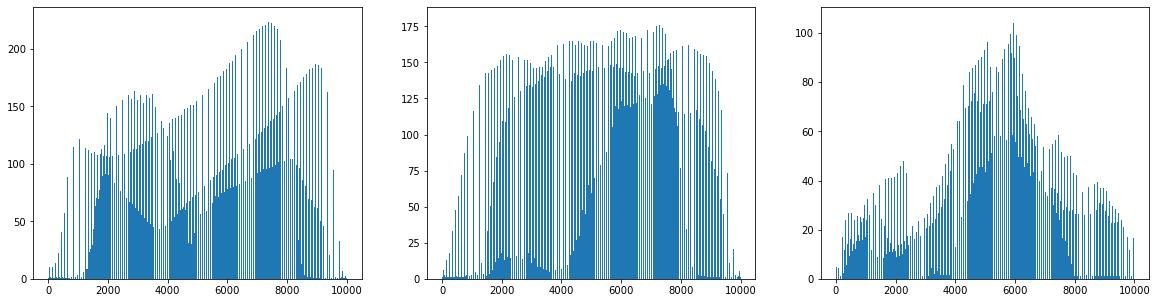

In [42]:
# Feature(픽셀별) 평균의 막대 그리기
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

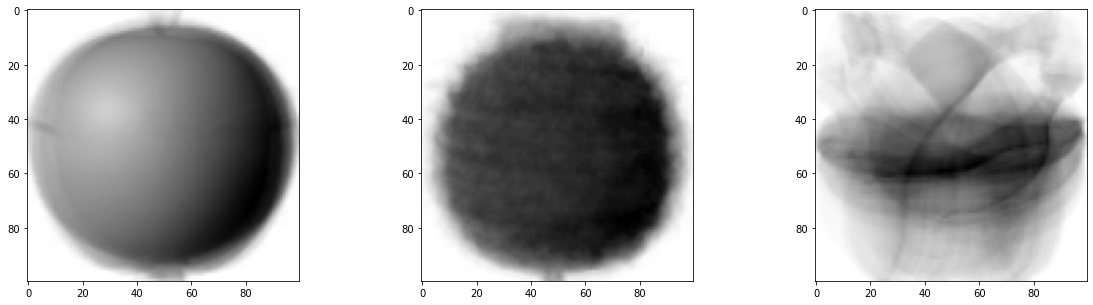

In [43]:
# 평균이미지로 그림 표현하기 : 이미지로 그리기 위해 다시 2차원 배열로 변경한다.
    # 위의 그래프를 100x100이미지로 reshape만들었다.
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')

plt.show()

### 평균값과 가까운 사진 고르기
- 위에서 구한 평균 이미지와 각 샘플들의 픽셀값과 비교하여 가장 가까운 거리의 이미지는 해당 과일일 것이다.(가설)
- 사과만 잘 분류하는지 시도해보자!

In [45]:
# 절댓값
    # 양수와 음수의 구분이 필요없으므로 절대값 사용
abs_diff = np.abs(fruits - apple_mean) 
    # abs_diff가 3차원이기때문에 page차원을 제외하고 행과 열만의 평균을 구한다.
abs_mean = np.mean(abs_diff , axis=(1,2)) 
    # 300개의 원소로 이루어진 1차원 배열
abs_mean.shape

(300,)

> abs_mean과 apple의 차이가 가장 적은 것으로 구분

In [48]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요 (arg.sort)
    # 해당 이미지의 index 값을 추출하는 법
apple_index = np.argsort(abs_mean)[:100]
apple_index


array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 30,
       68, 66, 24, 76, 15, 98, 84, 47, 90,  3, 94, 23, 32, 53, 71, 14,  7,
       73, 36, 77, 55, 21, 10, 39, 17, 99, 11, 35, 65, 95,  6, 61, 56, 22,
       89,  2, 13, 80,  0, 97,  4, 58, 40, 75, 43, 34, 82, 16, 54, 31, 49,
       93, 37, 63, 64, 41, 28, 25, 96, 67,  8, 83, 46, 19, 79, 72,  5, 85,
       20, 29, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

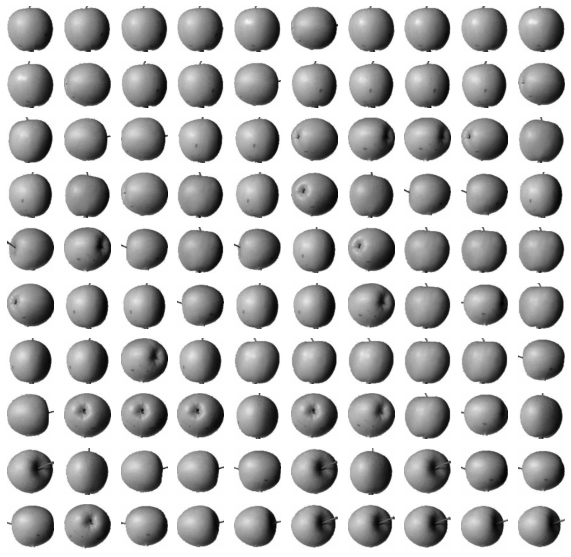

In [50]:
# 그림그려보기
fig, axs = plt.subplots(10,10, figsize=(10,10))

# 10개 10개 
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()

> 이와 같은 방법으로 비지도학습인 군집분류 알고리즘이 구성된다.

---
### 바나나로 확인해보기


In [53]:
# 절댓값
    # 양수와 음수의 구분이 필요없으므로 절대값 사용
abs_diff = np.abs(fruits - banana_mean) 
    # abs_diff가 3차원이기때문에 page차원을 제외하고 행과 열만의 평균을 구한다.
abs_mean = np.mean(abs_diff , axis=(1,2)) 
    # 300개의 원소로 이루어진 1차원 배열
abs_mean.shape


(300,)

In [56]:
# 300개의 데이터 중 차이가 적은 순으로 정렬하면서 해당 이미지를 불러오기 위한 index가 필요 (arg.sort)
    # 해당 이미지의 index 값을 추출하는 법
banana_index = np.argsort(abs_mean)[0:100]
banana_index


array([285, 212, 291, 261, 208, 286, 284, 265, 219, 276, 264, 290, 283,
       252, 255, 203, 266, 200, 201, 269, 247, 256, 281, 270, 211, 254,
       268, 239, 299, 225, 250, 275, 280, 232, 246, 205, 244, 263, 297,
       224, 279, 262, 238, 288, 289, 287, 218, 245, 217, 230, 274, 295,
       209, 220, 213, 267, 237, 229, 248, 278, 204, 243, 228, 206, 207,
       272, 241, 210, 214, 233, 222, 235, 277, 253, 294, 282, 240, 271,
       296, 249, 215, 258, 259, 227, 202, 236, 293, 260, 226, 216, 292,
       257, 221, 298, 251, 223, 242, 231,   9,  88])

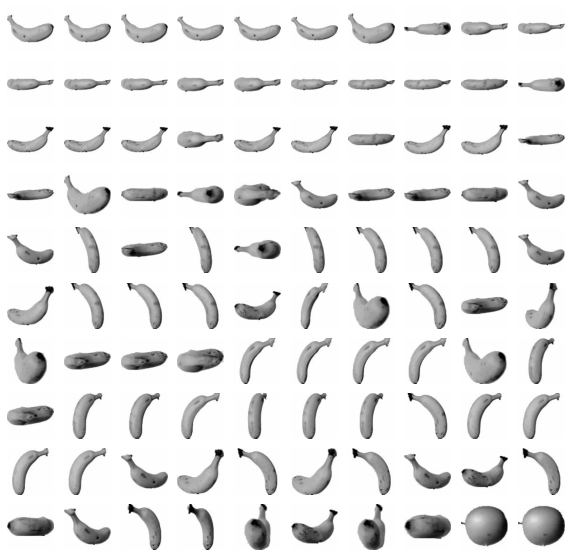

In [57]:
# 그림그려보기
fig, axs = plt.subplots(10,10, figsize=(10,10))

# 10개 10개 
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        axs[i,j].axis('off')
plt.show()